# K-Nearest Neighbours (KNN) – From Scratch

## 1. Introduction

KNN is a **non-parametric**, **instance-based** learning algorithm used for both **classification** and **regression**. It does not learn a model explicitly. Instead, it memorises the training data and makes predictions based on the majority (or average) of the closest points.

## 2. Key Concepts

- **Distance metric**: Typically Euclidean distance is used, but others (e.g., Manhattan, cosine) are possible.
- **K value**: The number of neighbours to consider. Must be chosen carefully (odd for binary classification).
- **No training**: All computation is deferred to prediction time.

## 3. Euclidean Distance Formula

Given two points $x = [x_1, x_2, \dots, x_n]$ and $y = [y_1, y_2, \dots, y_n]$:

$$
\text{distance}(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

## 4. KNN Algorithm Steps

### For classification:
1. Compute distance between test point and all training points.
2. Sort by distance and pick the top K.
3. Majority vote of the K labels gives the prediction.

### For regression:
3. Average the labels of the K nearest neighbours.

## 5. KNN Class Implementation in Python

In [1]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        for x in X_test:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            majority_vote = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(majority_vote)
        return np.array(predictions)

## 6. Example

In [2]:
# Sample 2D dataset
X_train = [[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]]
y_train = ['A', 'A', 'A', 'B', 'B', 'B']

X_test = [[4, 4], [7, 5]]

knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

print("Predictions:", preds)

Predictions: ['A' 'B']


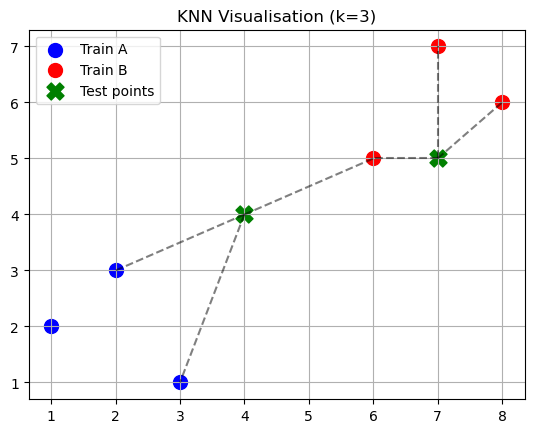

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test, return_neighbors=False):
        X_test = np.array(X_test)
        predictions = []
        all_neighbors = []
        for x in X_test:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            majority_vote = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(majority_vote)
            if return_neighbors:
                all_neighbors.append(self.X_train[k_indices])
        if return_neighbors:
            return np.array(predictions), all_neighbors
        return np.array(predictions)

# Sample data
X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y_train = np.array(['A', 'A', 'A', 'B', 'B', 'B'])
X_test = np.array([[4, 4], [7, 5]])

# Plotting
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
preds, neighbors = knn.predict(X_test, return_neighbors=True)

colors = {'A': 'blue', 'B': 'red'}

# Plot training points
for label in np.unique(y_train):
    pts = X_train[y_train == label]
    plt.scatter(pts[:, 0], pts[:, 1], label=f"Train {label}", color=colors[label], s=100)

# Plot test points
plt.scatter(X_test[:, 0], X_test[:, 1], color='green', s=150, marker='X', label='Test points')

# Draw lines to neighbours
for i, nbrs in enumerate(neighbors):
    for nbr in nbrs:
        plt.plot([X_test[i][0], nbr[0]], [X_test[i][1], nbr[1]], 'k--', alpha=0.5)

plt.legend()
plt.title("KNN Visualisation (k=3)")
plt.grid(True)
plt.show()